/var/folders/rf/7mxkckvj67n75dgt_jp9hz400000gn/T/ipykernel_74090/2496187361.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs, ignore_index=True)


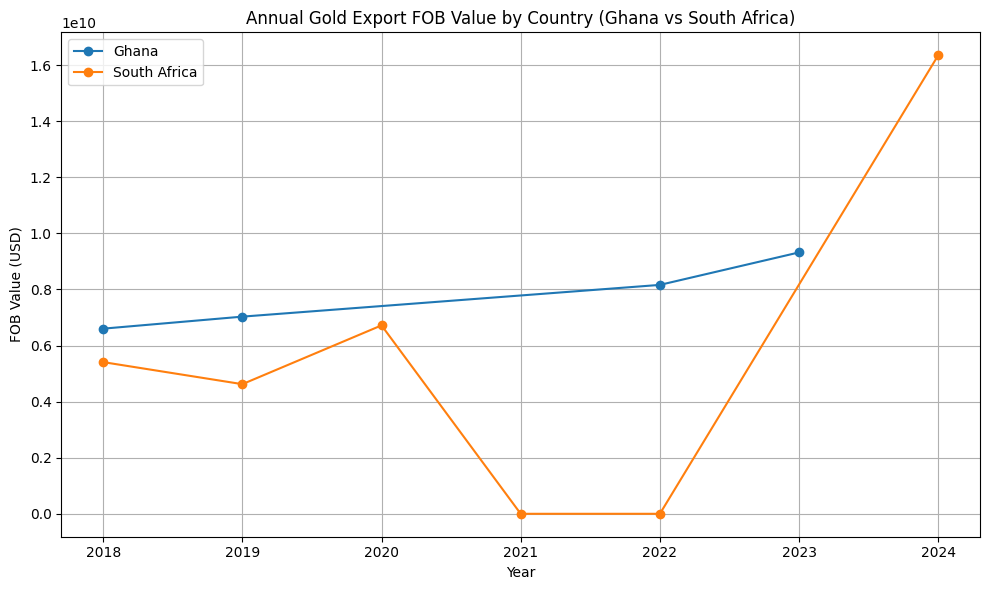

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load combined cleaned data
data_path = "../data/cleaned"
files = [f for f in os.listdir(data_path) if f.endswith(".csv")]

dfs = []
for f in files:
    df = pd.read_csv(os.path.join(data_path, f))
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Ensure year is numeric
combined_df['year'] = pd.to_numeric(combined_df['year'], errors='coerce')

# Group by country and year
trend_data = (
    combined_df
    .groupby(['reporting_country', 'year'])['fob_value']
    .sum()
    .reset_index()
)

# Plot export trends
plt.figure(figsize=(10, 6))
for country in trend_data['reporting_country'].unique():
    subset = trend_data[trend_data['reporting_country'] == country]
    plt.plot(subset['year'], subset['fob_value'], marker='o', label=country)

plt.title("Annual Gold Export FOB Value by Country (Ghana vs South Africa)")
plt.xlabel("Year")
plt.ylabel("FOB Value (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


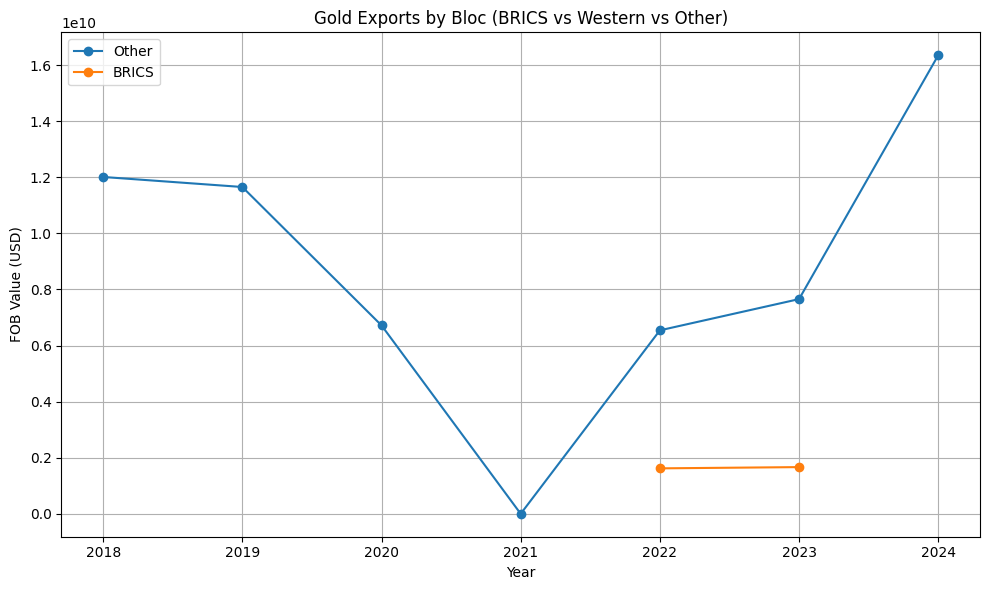

In [5]:
# STEP 1: Define BRICS and Western countries by full name
brics_names = {
    'Brazil', 'Russia', 'India', 'China', 'South Africa'
}
western_names = {
    'United States', 'United Kingdom', 'Germany', 'France', 'Canada', 'Italy', 'Japan'
}

# STEP 2: Classify each partner_country into a bloc
def classify_bloc_by_name(name):
    if name in brics_names:
        return 'BRICS'
    elif name in western_names:
        return 'Western'
    else:
        return 'Other'

combined_df['bloc'] = combined_df['partner_country'].apply(classify_bloc_by_name)

# STEP 3: Aggregate FOB values by year and bloc
bloc_summary = (
    combined_df
    .groupby(['year', 'bloc'])['fob_value']
    .sum()
    .reset_index()
)

# STEP 4: Plot
plt.figure(figsize=(10, 6))
for bloc in bloc_summary['bloc'].unique():
    subset = bloc_summary[bloc_summary['bloc'] == bloc]
    plt.plot(subset['year'], subset['fob_value'], marker='o', label=bloc)

plt.title("Gold Exports by Bloc (BRICS vs Western vs Other)")
plt.xlabel("Year")
plt.ylabel("FOB Value (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
combined_df[combined_df['reporting_country'] == 'South Africa'].groupby('year')['fob_value'].sum()


year
2018    5.408093e+09
2019    4.621659e+09
2020    6.717409e+09
2021    1.525923e+05
2022    1.765838e+05
2024    1.634815e+10
Name: fob_value, dtype: float64

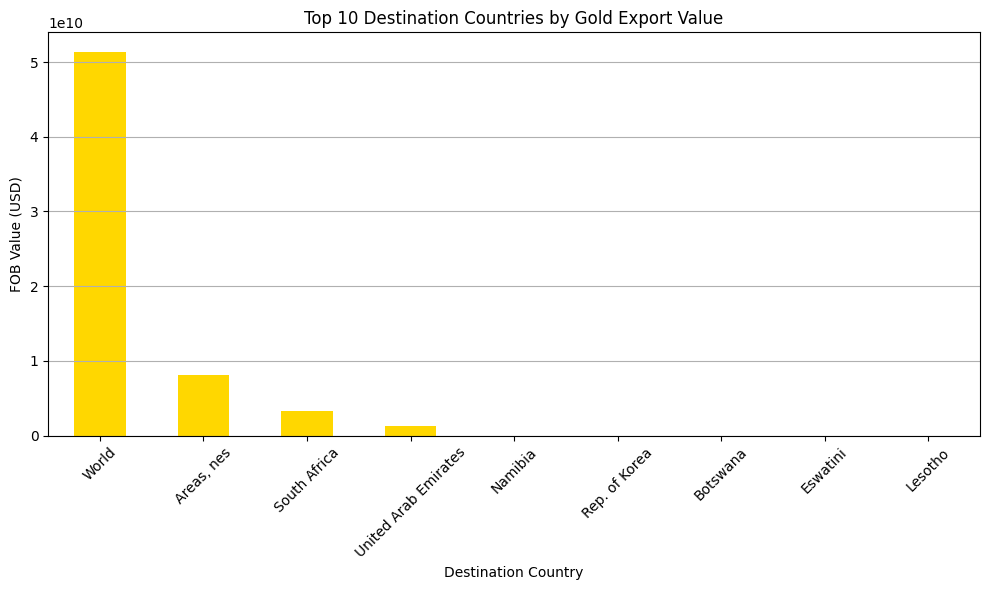

In [7]:
# Aggregate total exports by partner country (all years)
top_partners = (
    combined_df
    .groupby('partner_country')['fob_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
top_partners.plot(kind='bar', color='gold')
plt.title("Top 10 Destination Countries by Gold Export Value")
plt.ylabel("FOB Value (USD)")
plt.xlabel("Destination Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


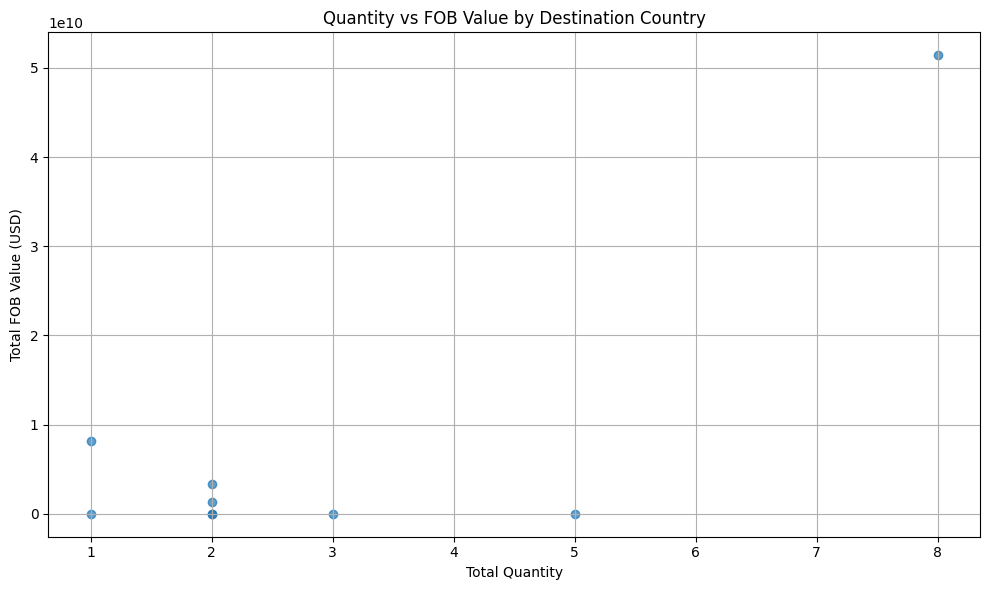

In [8]:
# Group by partner_country: total quantity and FOB value
volume_vs_value = (
    combined_df
    .groupby('partner_country')[['quantity', 'fob_value']]
    .sum()
    .reset_index()
)

# Remove outliers (optional)
volume_vs_value = volume_vs_value[
    (volume_vs_value['quantity'] > 0) & 
    (volume_vs_value['fob_value'] > 0)
]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(volume_vs_value['quantity'], volume_vs_value['fob_value'], alpha=0.7)
plt.title("Quantity vs FOB Value by Destination Country")
plt.xlabel("Total Quantity")
plt.ylabel("Total FOB Value (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


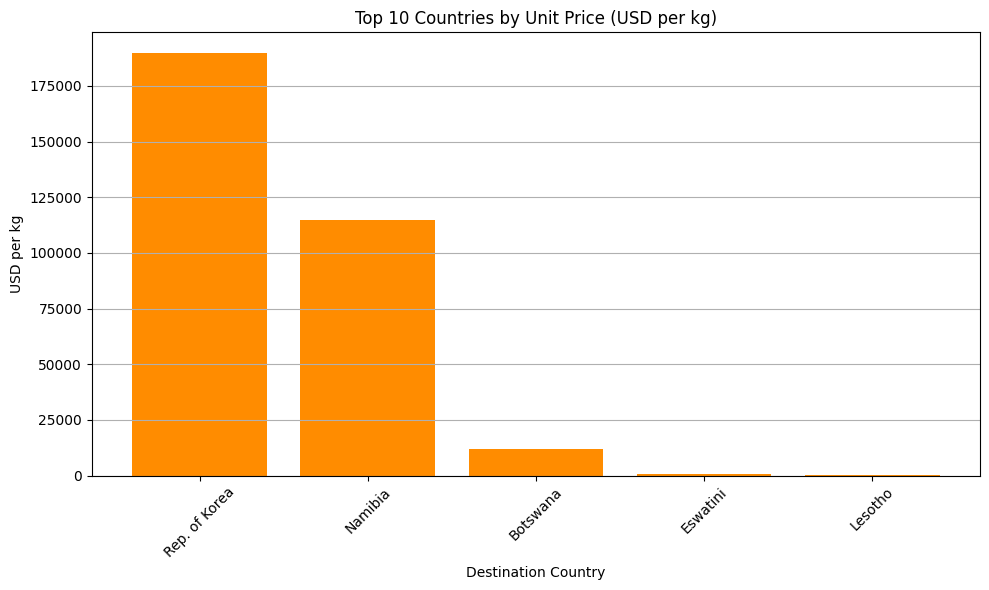

In [9]:
# Group by destination country
unit_price_df = (
    combined_df
    .groupby('partner_country')[['fob_value', 'net_weight_kg']]
    .sum()
    .reset_index()
)

# Calculate unit price (USD per kg)
unit_price_df['usd_per_kg'] = unit_price_df['fob_value'] / unit_price_df['net_weight_kg']
unit_price_df = unit_price_df.dropna().sort_values('usd_per_kg', ascending=False)

# Filter to valid values
unit_price_df = unit_price_df[unit_price_df['usd_per_kg'].between(10, 200000)]  # drop extreme outliers

# Plot top 10
top_prices = unit_price_df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_prices['partner_country'], top_prices['usd_per_kg'], color='darkorange')
plt.title("Top 10 Countries by Unit Price (USD per kg)")
plt.xlabel("Destination Country")
plt.ylabel("USD per kg")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


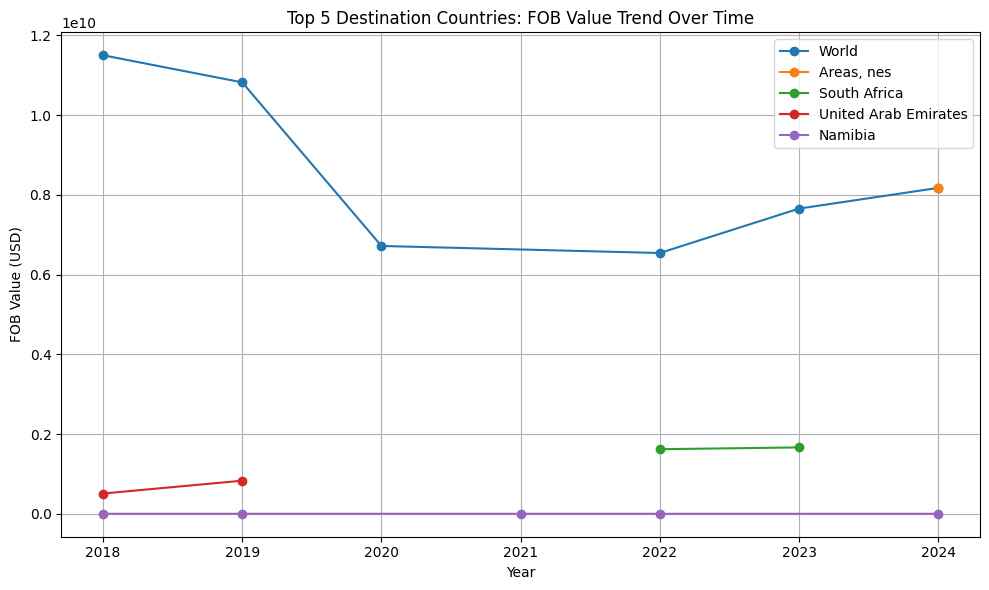

In [10]:
# Group by year and partner_country
partner_trend = (
    combined_df
    .groupby(['year', 'partner_country'])['fob_value']
    .sum()
    .reset_index()
)

# Top 5 countries by total value (to keep chart readable)
top_partners = (
    partner_trend
    .groupby('partner_country')['fob_value']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# Filter to top 5
partner_trend = partner_trend[partner_trend['partner_country'].isin(top_partners)]

# Plot
plt.figure(figsize=(10, 6))
for country in top_partners:
    subset = partner_trend[partner_trend['partner_country'] == country]
    plt.plot(subset['year'], subset['fob_value'], marker='o', label=country)

plt.title("Top 5 Destination Countries: FOB Value Trend Over Time")
plt.xlabel("Year")
plt.ylabel("FOB Value (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Reclassify bloc in case it's missing
def classify_bloc_by_name(name):
    if name in {'Brazil', 'Russia', 'India', 'China', 'South Africa'}:
        return 'BRICS'
    elif name in {'United States', 'United Kingdom', 'Germany', 'France', 'Canada', 'Italy', 'Japan'}:
        return 'Western'
    else:
        return 'Other'

combined_df['bloc'] = combined_df['partner_country'].apply(classify_bloc_by_name)
